<a href="https://colab.research.google.com/github/zzhu104/MAT-421/blob/main/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 1 Linear Algebra**

The vector y = (3.21, 1.77, 3.65) can be easily written as a linear combination of the unit vectors (0,0,1), (0,1,0) and (1,0,0):

(3.21, 1.77, 3.65) = 3.21 · (1,0,0) + 1.77 (0,1,0) + 3.65 · (0,0,1)

We can do the calculation with Python, using the module numpy:

In [1]:
import numpy as np
x = np.array([[0, 0, 1],
              [0, 1, 0],
              [1, 0, 0]])
y = ([3.65, 1.55, 3.42])
scalars = np.linalg.solve(x, y)
scalars

array([3.42, 1.55, 3.65])

The previous example was very easy, because we could work out the result in our head. What about writing our vector y = (3.21, 1.77, 3.65) as a linear combination of the vectors (0,1,1), (1,1,0) and (1,0,1)? It looks like this in Python:

In [2]:
import numpy as np
x = np.array([[0, 1, 1],
              [1, 1, 0],
              [1, 0, 1]])
y = ([3.65, 1.55, 3.42])
scalars = np.linalg.solve(x, y)
scalars

array([0.66, 0.89, 2.76])

Any integer between -40 and 40 can be written as a linear combination of 1, 3, 9, 27 with scalars being elements of the set {-1, 0, 1}.

For example:

7 = 1 · 1 + (-1) · 3 + 1 · 9 + 0 · 27

We can calculate these scalars with Python. First we need a generator generating all the possible scalar combinations. If you have problems in understanding the concept of a generator, we recommend the chapter "Iterators and Generators" of our tutorial.

In [ ]:
def factors_set():
    for i in [-1, 0, 1]:
        for j in [-1,0,1]:
            for k in [-1,0,1]:
                for l in [-1,0,1]:
                    yield (i, j, k, l)  

We will use the memoize() technique to memorize previous results:

In [ ]:
def memoize(f):
    results = {}
    def helper(n):
        if n not in results:
            results[n] = f(n)
        return results[n]
    return helper

Finally, in our function linear_combination() we check every scalar tuple, if it can create the value n:

In [ ]:
@memoize
def linear_combination(n):
    """ returns the tuple (i,j,k,l) satisfying
        n = i*1 + j*3 + k*9 + l*27      """
    weighs = (1,3,9,27)
      
    for factors in factors_set():
       sum = 0
       for i in range(len(factors)):
          sum += factors[i] * weighs[i]
       if sum == n:
          return factors

Putting it all together results in the following script:

In [ ]:
def factors_set():
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            for k in [-1, 0, 1]:
                for l in [-1, 0, 1]:
                    yield (i, j, k, l)  


def memoize(f):
    results = {}
    def helper(n):
        if n not in results:
            results[n] = f(n)
        return results[n]
    return helper

@memoize
def linear_combination(n):
    """ returns the tuple (i,j,k,l) satisfying
        n = i*1 + j*3 + k*9 + l*27      """
    weighs = (1, 3, 9, 27)
      
    for factors in factors_set():
       sum = 0
       for i in range(len(factors)):
          sum += factors[i] * weighs[i]
       if sum == n:
          return factors

# calculate the linear combinations of the first 10 positive integers:
for i in range(1,11):
    print(linear_combination(i))

Visualization of Orthogonal Vectors

First, a 2D representation of orthogonal vectors.

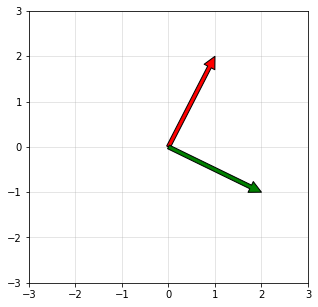

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

ax.grid(alpha=0.4)
ax.set(xlim=(-3, 3), ylim=(-3, 3))

v1 = np.array([1,  2])
v2 = np.array([2, -1])

# Plot the orthogonal vectors
ax.annotate('', xy=v1, xytext=(0, 0), arrowprops=dict(facecolor='r'))
ax.annotate('', xy=v2, xytext=(0, 0), arrowprops=dict(facecolor='g'))
plt.show()

And here's an example of orthogonal vectors in 3D space.

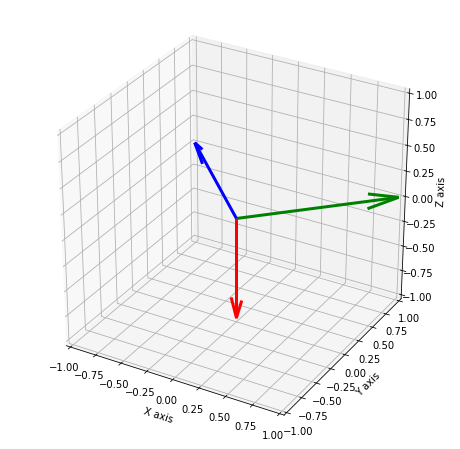

In [5]:
# 3D representation of the orthogonal vectors
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the orthogonal vectors
v1 = np.array([ 0, 0, -1])
v2 = np.array([ 1, 1, 0])
v3 = np.array([-1, 1, 0])
 
# Plot the orthogonal vectors
ax.quiver( 0, 0, 0, v1[0], v1[1], v1[2], color = 'r', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v2[0], v2[1], v2[2], color = 'g', lw=3, arrow_length_ratio=0.2)
ax.quiver( 0, 0, 0, v3[0], v3[1], v3[2], color = 'b', lw=3, arrow_length_ratio=0.2)

ax.set_xlim([-1, 1]), ax.set_ylim([-1, 1]), ax.set_zlim([-1, 1])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()

Linear Regression

Step 1: Import packages and classes

The first step is to import the package numpy and the class LinearRegression from sklearn.linear_model:

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

Step 2: Provide data

The second step is defining data to work with. The inputs (regressors, 𝑥) and output (predictor, 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects. This is the simplest way of providing data for regression:

In [7]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

Step 3: Create a model and fit it

The next step is to create a linear regression model and fit it using the existing data.

Let’s create an instance of the class LinearRegression, which will represent the regression model:

In [8]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

Step 4: Get results

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and interpret it.

You can obtain the coefficient of determination (𝑅²) with .score() called on model:

In [9]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.7158756137479542


In [10]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.633333333333329
slope: [0.54]


In [11]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [5.63333333]
slope: [[0.54]]


In [12]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [13]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [14]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]
